In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

col_list = ['Humidity']
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sensor_data1.csv', usecols=col_list)
dataset

,Humidity
0,31
1,31
2,31
3,31
4,32
...,...
1681,48
1682,48
1683,48
1684,47


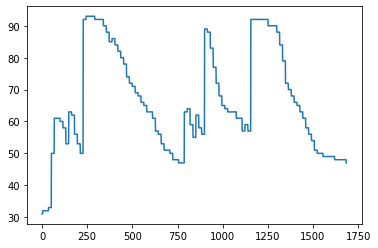

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dataset)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.27419355],
       [0.25806452],
       [0.25806452]])

In [ ]:
PAST_SET = 10
test_data = scaled_data[:,:]
x_test = []
y_test = dataset.iloc[PAST_SET:,:]
for i in range(PAST_SET, len(test_data)):
  x_test.append(test_data[i-PAST_SET:i,0])

In [ ]:
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/Colab Notebooks/saved_model.h5')

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

Humidity    0.07456
dtype: float64

In [ ]:
data = dataset.filter(['Humidity'])
valid = dataset[-500:]
valid['Predictions'] = predictions[-500:]

plt.figure(figsize = (25,13))
plt.plot(valid[['Humidity', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='best')